In [24]:
#kaggle link : https://www.kaggle.com/code/d410qc/modelo-de-clasificacion-de-ataques-en-red/notebook#ENTRENAMIENTO-Y-PRUEBAS-DE-MODELO-CON-RANDOM-FOREST

'''Artificial Intelligence in Cybersecurity

Classification model for identifying attacks (Brute Force, Probing, and Crypto Miner) within network traffic'''

'Artificial Intelligence in Cybersecurity\n\nClassification model for identifying attacks (Brute Force, Probing, and Crypto Miner) within network traffic'

In [25]:
# Import the necessary libraries to load data, split datasets,
# build the nearest neighbors model, and evaluate performance.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt


In [26]:
df = pd.read_csv('/Users/suchirmvelpanur/Desktop/ISFCR Internship/datasets/IDS Datasets/ALLFLOWMETER_HIKARI2021.csv')

In [27]:
df.head(1)
df.tail(2)

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
555276,555276,280841,CknUJi2R1iYJG3li3k,103.255.15.42,138,103.255.15.255,138,0.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,XMRIGCC CryptoMiner,1
555277,555277,280842,C82mlb2i3zEzpeTGQk,103.255.15.42,138,103.255.15.255,138,0.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,XMRIGCC CryptoMiner,1


In [28]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'uid', 'originh', 'originp', 'responh',
       'responp', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot',
       'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec',
       'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio',
       'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max',
       'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max',
       'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
       'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count',
       'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count',
       'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
       'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
       'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot',
       'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max'

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 88 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              555278 non-null  int64  
 1   Unnamed: 0                555278 non-null  int64  
 2   uid                       555278 non-null  object 
 3   originh                   555278 non-null  object 
 4   originp                   555278 non-null  int64  
 5   responh                   555278 non-null  object 
 6   responp                   555278 non-null  int64  
 7   flow_duration             555278 non-null  float64
 8   fwd_pkts_tot              555278 non-null  int64  
 9   bwd_pkts_tot              555278 non-null  int64  
 10  fwd_data_pkts_tot         555278 non-null  int64  
 11  bwd_data_pkts_tot         555278 non-null  int64  
 12  fwd_pkts_per_sec          555278 non-null  float64
 13  bwd_pkts_per_sec          555278 non-null  f

In [31]:
# Drop 'uid' and 'Unnamed : 0' and 'Unnamed : 0.1' columns as it has no relevance to the model
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'uid'], inplace=True)
df

,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,6,6,6.794746,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,6,6,0.960045,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,6,5,1.147225,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,6,5,1.401058,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,6,5,1.799345,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200,65160,0,Bruteforce-XML,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555273,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,1,0,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555274,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,1,0,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555275,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,1,0,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555276,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,1,0,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   originh                   555278 non-null  object 
 1   originp                   555278 non-null  int64  
 2   responh                   555278 non-null  object 
 3   responp                   555278 non-null  int64  
 4   flow_duration             555278 non-null  float64
 5   fwd_pkts_tot              555278 non-null  int64  
 6   bwd_pkts_tot              555278 non-null  int64  
 7   fwd_data_pkts_tot         555278 non-null  int64  
 8   bwd_data_pkts_tot         555278 non-null  int64  
 9   fwd_pkts_per_sec          555278 non-null  float64
 10  bwd_pkts_per_sec          555278 non-null  float64
 11  flow_pkts_per_sec         555278 non-null  float64
 12  down_up_ratio             555278 non-null  float64
 13  fwd_header_size_tot       555278 non-null  i

In [33]:
from sklearn.preprocessing import LabelEncoder

# Fit LabelEncoder on the entire 'originh' and 'responh' columns
le_originh = LabelEncoder()
le_responh = LabelEncoder()
df['originh'] = le_originh.fit_transform(df['originh'])
df['responh'] = le_responh.fit_transform(df['responh'])


In [34]:
# Apply One-Hot Encoding for 'traffic_category'
df = pd.get_dummies(df, columns=['traffic_category'])


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 90 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   originh                               555278 non-null  int64  
 1   originp                               555278 non-null  int64  
 2   responh                               555278 non-null  int64  
 3   responp                               555278 non-null  int64  
 4   flow_duration                         555278 non-null  float64
 5   fwd_pkts_tot                          555278 non-null  int64  
 6   bwd_pkts_tot                          555278 non-null  int64  
 7   fwd_data_pkts_tot                     555278 non-null  int64  
 8   bwd_data_pkts_tot                     555278 non-null  int64  
 9   fwd_pkts_per_sec                      555278 non-null  float64
 10  bwd_pkts_per_sec                      555278 non-null  float64
 11  

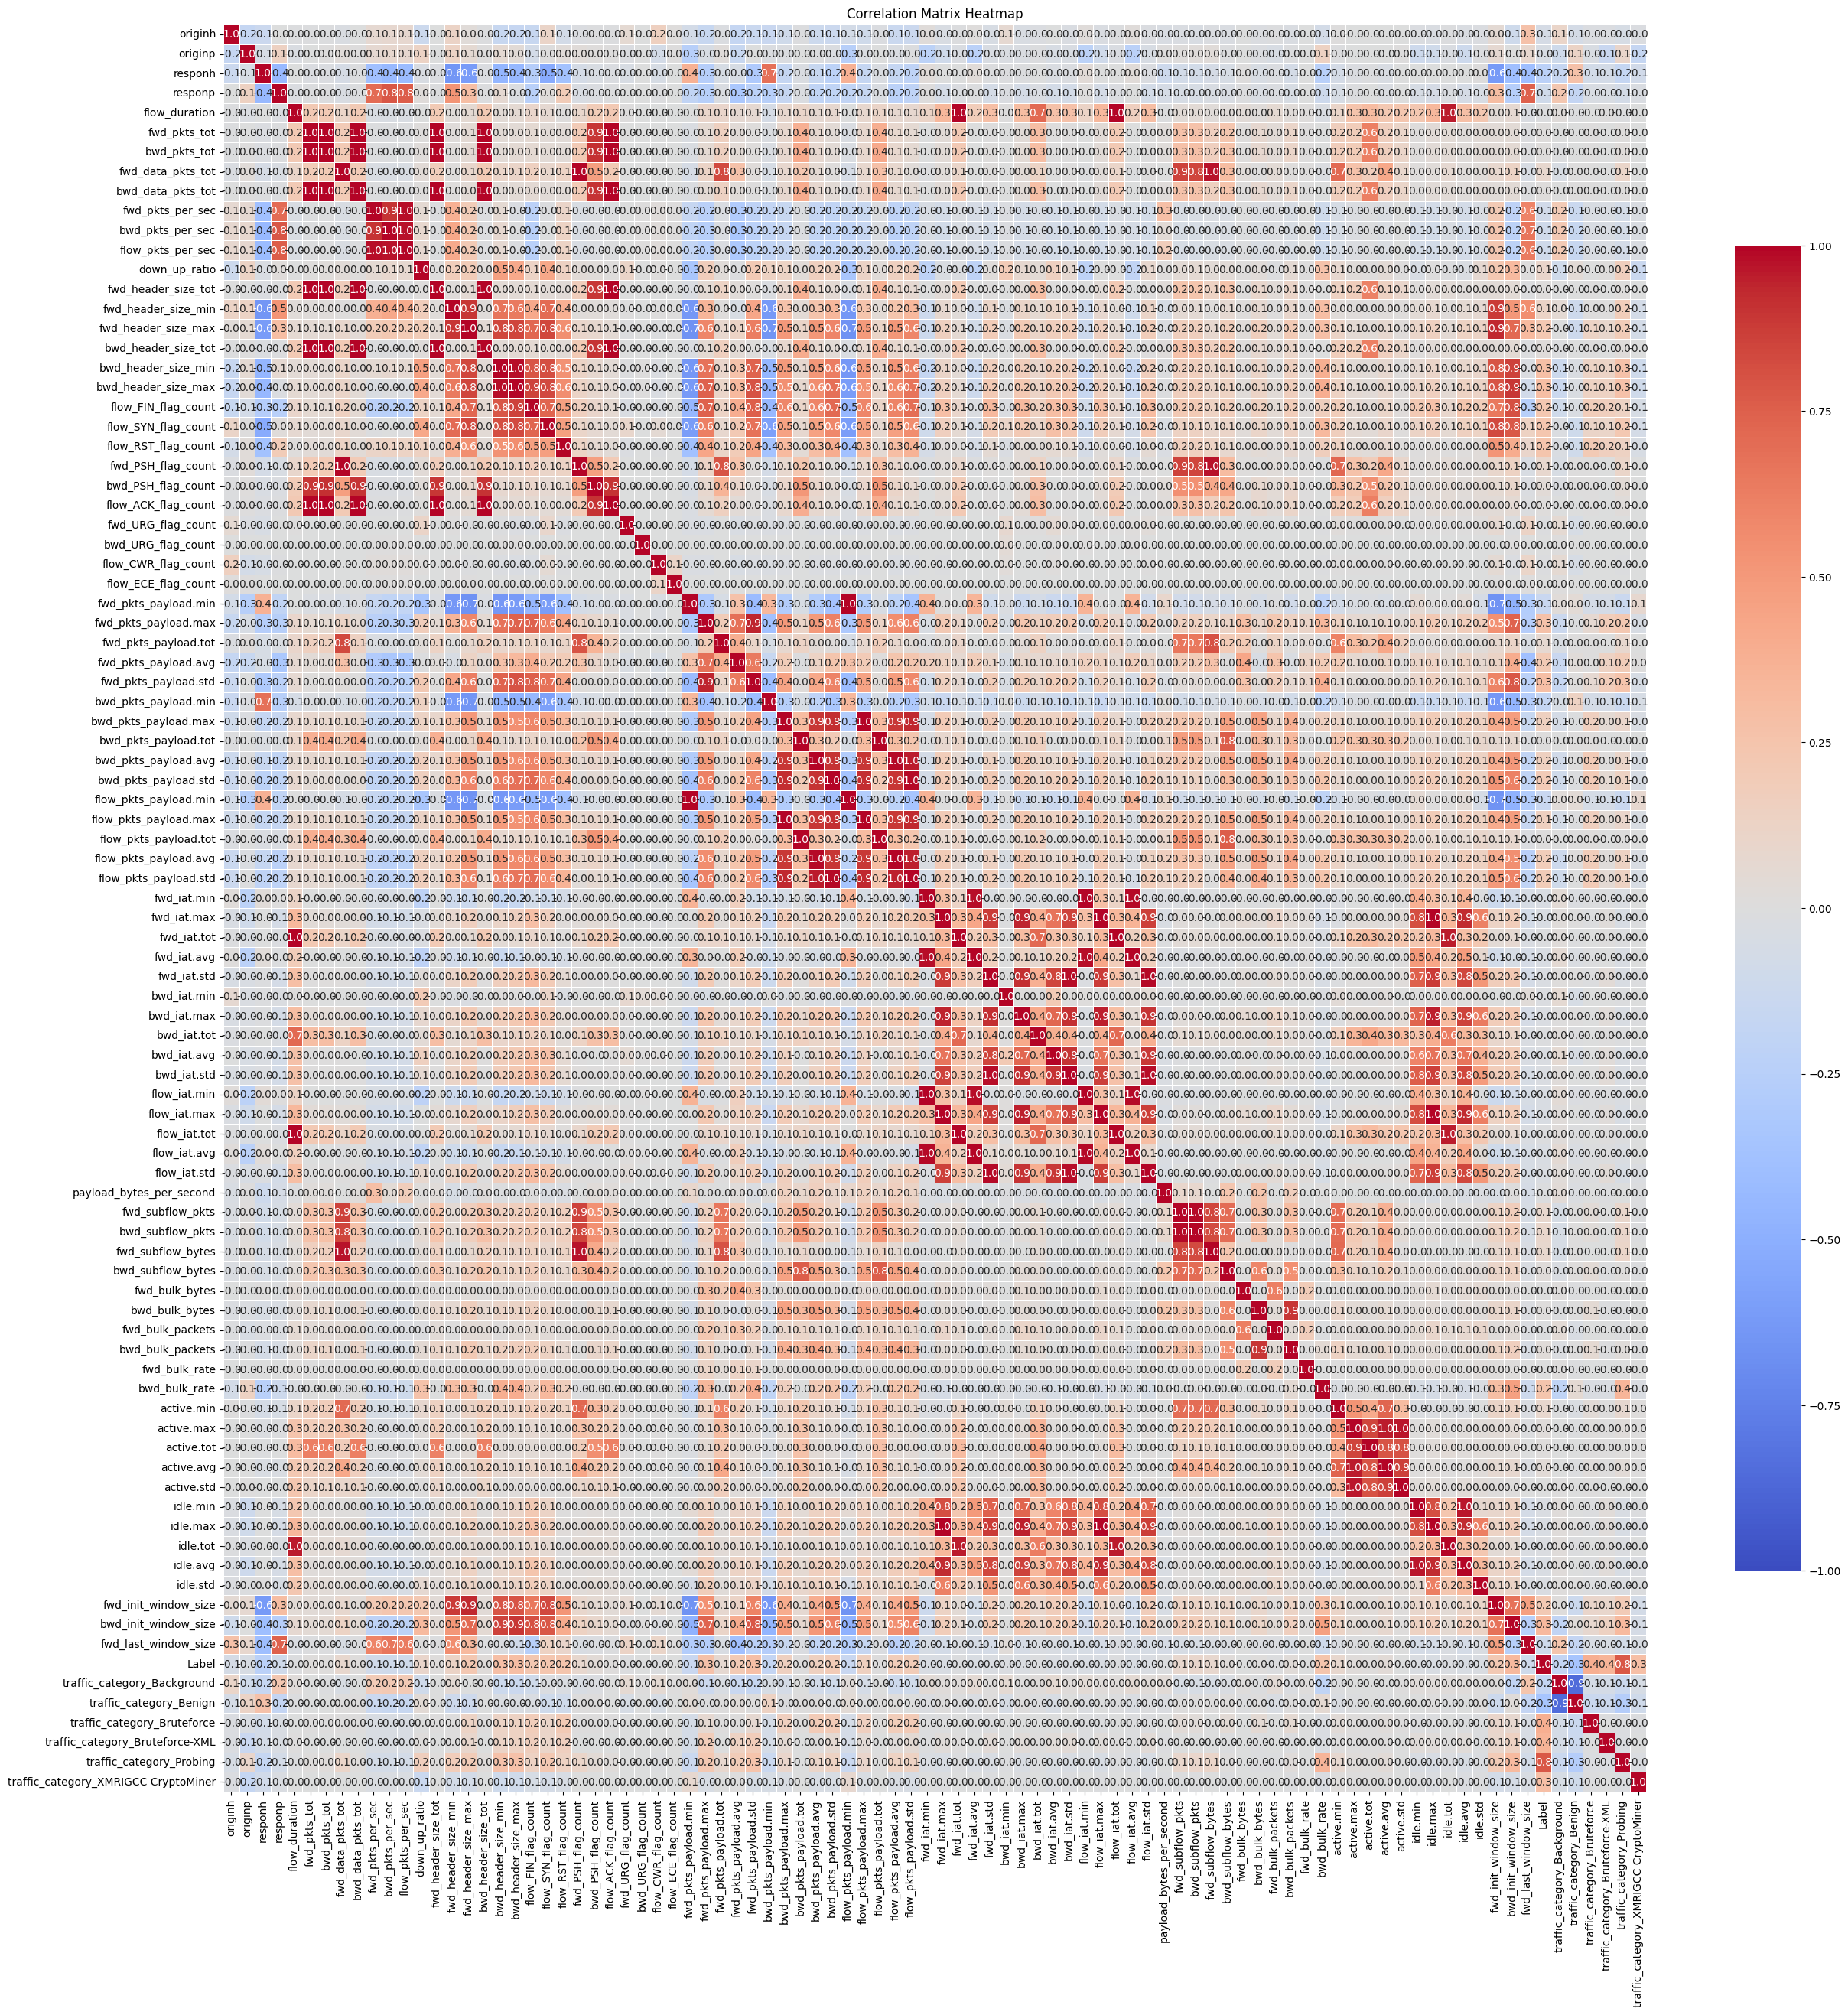

In [42]:
import seaborn as sns

corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(30, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, 
            annot=True,           # Annotate cells with the correlation values
            fmt=".1f",            # Format the annotations to two decimal places
            cmap='coolwarm',      # Color map
            vmin=-1, vmax=1,      # Value range for the colormap
            linewidths=.5,        # Line width between cells
            cbar_kws={"shrink": .75})  # Color bar size

plt.title('Correlation Matrix Heatmap')
plt.show()

In [43]:
# Create a new DataFrame "data_X" by dropping the "label" column.
df_X = df.drop(["Label"], axis=1)

# Create a Series "data_y" that contains only the "label" column.
df_y = df["Label"]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=55)

In [45]:
# Create an instance of the KNeighborsClassifier model with 3 neighbors.
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training set.
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [46]:
# Make predictions on the test set using the KNN model.
prediccion_knn = knn_model.predict(X_test)

# Define class labels for the classification report.
clases = ['Normal', 'Attack']

# Print a classification report that shows evaluation metrics such as precision, recall, and f1-score.
print(classification_report(y_test, prediccion_knn, target_names=clases))


              precision    recall  f1-score   support

      Normal       0.94      0.96      0.95    155298
      Attack       0.30      0.23      0.26     11286

    accuracy                           0.91    166584
   macro avg       0.62      0.59      0.61    166584
weighted avg       0.90      0.91      0.91    166584



In [49]:
confusion_matrix(y_test, prediccion_knn)


array([[149310,   5988],
       [  8738,   2548]])

In [50]:
# Calculate the ROC curve by comparing the actual labels (y_test) with the model's predictions (prediccion_knn).
false_positive, true_positive, _ = roc_curve(y_test, prediccion_knn)

# Calculate the area under the curve (AUC) to evaluate the model's performance.
auc = roc_auc_score(y_test, prediccion_knn)
auc


0.5936041546684175

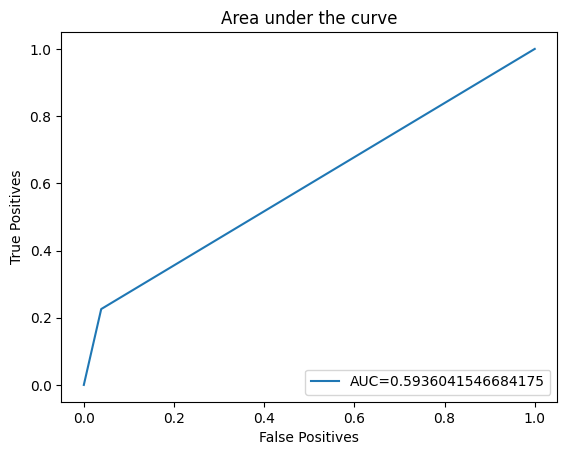

In [51]:
# Plot the ROC curve using false positives and true positives values.
plt.plot(false_positive, true_positive, label="AUC="+str(auc))
plt.title("Area under the curve")
plt.ylabel("True Positives")
plt.xlabel("False Positives")
plt.legend(loc=4)
plt.show()


In [52]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier model.
classifier = RandomForestClassifier()

# Train the model using the training set.
classifier.fit(X_train, y_train)


RandomForestClassifier()

In [53]:
# Make predictions on the test set using the Random Forest model.
prediction_RF = classifier.predict(X_test)

# Print a classification report that shows evaluation metrics such as precision, recall, and f1-score.
print(classification_report(y_test, prediction_RF))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    155298
           1       1.00      1.00      1.00     11286

    accuracy                           1.00    166584
   macro avg       1.00      1.00      1.00    166584
weighted avg       1.00      1.00      1.00    166584



In [55]:
# Select columns 'flow_duration', 'fwd_pkts_per_sec', and 'Label' from the original dataset.
data_gr6 = df[["flow_duration", "fwd_pkts_per_sec", "Label"]]

# Create a new feature set "data_gr6X" by excluding the 'label' column.
data_gr6X = data_gr6.drop(['Label'], axis=1)

# Create a Series "data_gr6y" that contains only the 'label' column.
data_gr6y = data_gr6['Label']


In [56]:
# Use train_test_split to split the features and labels of the new dataset.
# Reserve 30% of the data for the test set and set a random seed (random_state) to 55 for reproducibility.
XX_train, XX_test, yy_train, yy_test = train_test_split(data_gr6X, data_gr6y, test_size=0.3, random_state=55)


In [57]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model.
regresionlog = LogisticRegression()

# Train the model using the training set from the new dataset.
regresionlog.fit(XX_train, yy_train)


LogisticRegression()

In [58]:
# Make predictions on the test set using the logistic regression model.
prediccion_RLog = regresionlog.predict(XX_test)

# Define class labels for the classification report.
clases_RLog = ['Normal', 'Attack']

# Print a classification report that shows evaluation metrics such as precision, recall, and f1-score.
print(classification_report(yy_test, prediccion_RLog, target_names=clases_RLog))


              precision    recall  f1-score   support

      Normal       0.93      1.00      0.96    155298
      Attack       0.00      0.00      0.00     11286

    accuracy                           0.93    166584
   macro avg       0.47      0.50      0.48    166584
weighted avg       0.87      0.93      0.90    166584



/Users/suchirmvelpanur/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suchirmvelpanur/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suchirmvelpanur/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)